# Importing Libraries

In [46]:
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer

import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier 

from numpy import mean
from numpy import std
from sklearn import metrics

# Reading data

In [47]:
train  = pd.read_csv('train_tweet.csv')
test = pd.read_csv('test_tweet.csv')

In [48]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


# Cleaning Tweets

In [49]:
combi = train.append(test, ignore_index=True)

In [50]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 

In [51]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")

In [52]:
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

<ipython-input-52-b3b115ea5640>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")


In [53]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [54]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [55]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [56]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: tidy_tweet, dtype: object

In [57]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combi['tidy_tweet'] = tokenized_tweet

# Visualising Tweets

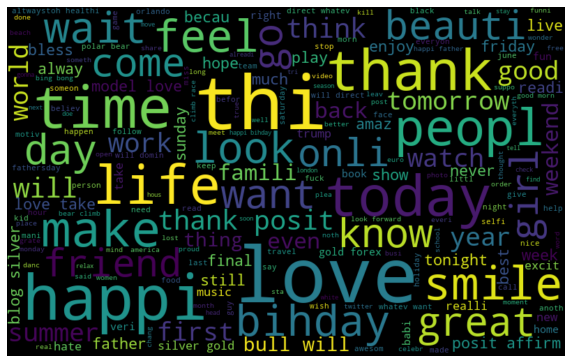

In [58]:
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

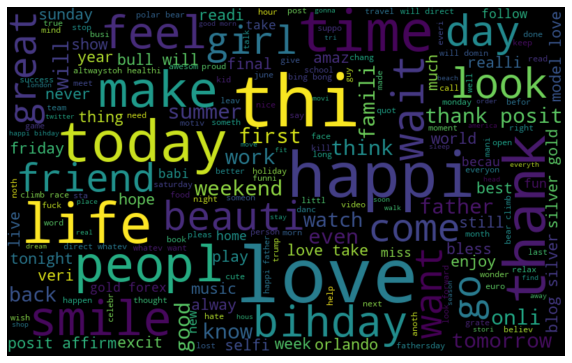

In [59]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

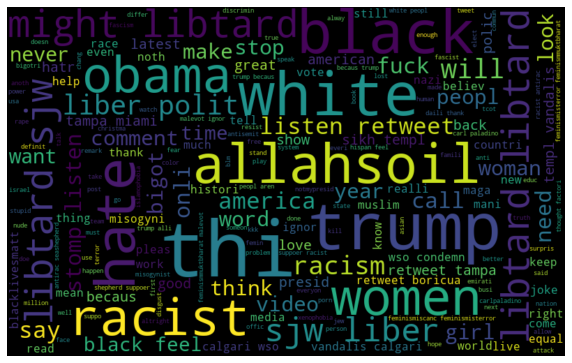

In [60]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [61]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [62]:
HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

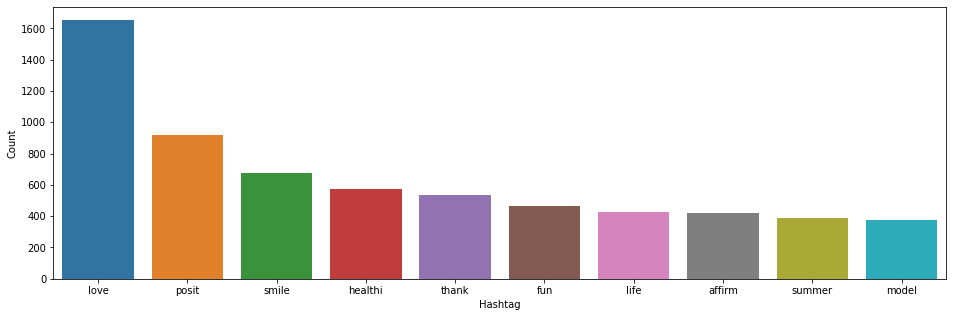

In [63]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

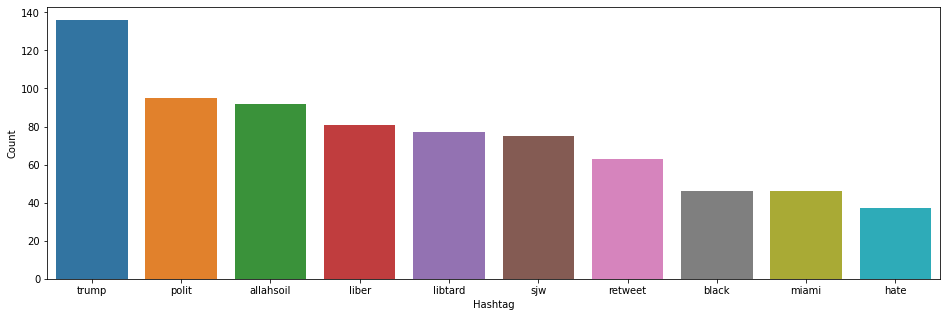

In [64]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])

# Logistic Regression Model

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) # calculating f1 score

0.5295587010824313

# Train Test Split: 80-20

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.2)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) # calculating f1 score

0.571773220747889

In [69]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file

In [70]:
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

0.5714285714285715

In [71]:
test.shape

(17197, 3)

In [72]:
train.shape

(31962, 3)

In [73]:
test.head()

,id,tweet,label
0,31963,#studiolife #aislife #requires #passion #dedic...,0
1,31964,@user #white #supremacists want everyone to s...,0
2,31965,safe ways to heal your #acne!! #altwaystohe...,0
3,31966,is the hp and the cursed child book up for res...,0
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",0


# Function for model evaluation

In [74]:
def model_Evaluate(model):
# Predict values for Test dataset
    y_pred = model.predict(xvalid_bow)
# Print the evaluation metrics for the dataset.
    print(classification_report(yvalid, y_pred))
# Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(yvalid, y_pred)
    categories = ['Positive', 'Negative']
    group_names = ['True pos','False neg', 'False Pos','True neg']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

# Bernoulli Naive Baye's Model

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      5937
           1       0.59      0.54      0.56       456

    accuracy                           0.94      6393
   macro avg       0.78      0.76      0.76      6393
weighted avg       0.94      0.94      0.94      6393



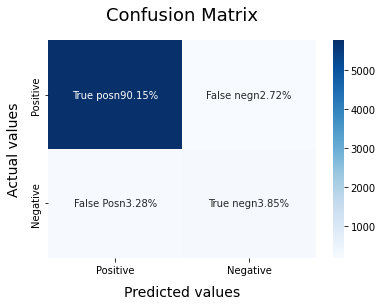

In [75]:
BNBmodel = BernoulliNB()
BNBmodel.fit(xtrain_bow, ytrain)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(xvalid_bow)

# Support Vector Classifier model

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      5937
           1       0.74      0.40      0.52       456

    accuracy                           0.95      6393
   macro avg       0.85      0.69      0.75      6393
weighted avg       0.94      0.95      0.94      6393



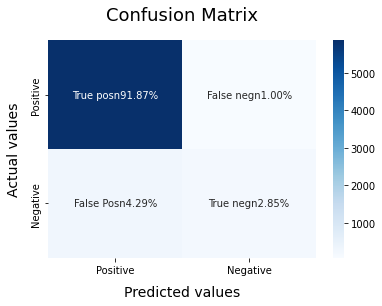

In [76]:
SVCmodel = LinearSVC()
SVCmodel.fit(xtrain_bow, ytrain)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(xvalid_bow)

# Logistic Regression Model

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      5937
           1       0.75      0.40      0.52       456

    accuracy                           0.95      6393
   macro avg       0.85      0.69      0.75      6393
weighted avg       0.94      0.95      0.94      6393



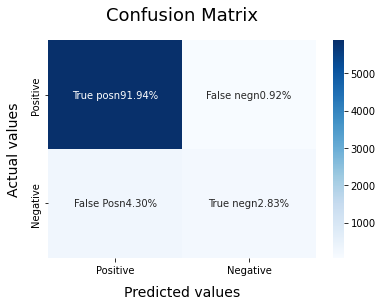

In [77]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(xtrain_bow, ytrain)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(xvalid_bow)


# Decision Tree Classifier Model

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      5937
           1       0.49      0.51      0.50       456

    accuracy                           0.93      6393
   macro avg       0.73      0.73      0.73      6393
weighted avg       0.93      0.93      0.93      6393



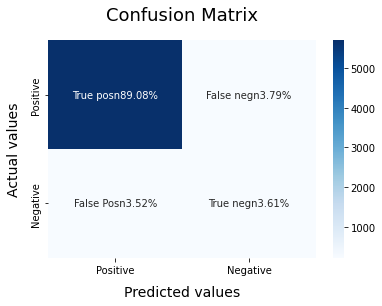

In [78]:
DTmodel=DecisionTreeClassifier(random_state=0)
DTmodel.fit(xtrain_bow, ytrain)
model_Evaluate(DTmodel)
y_pred2 = DTmodel.predict(xvalid_bow)

# Cross Validation Model

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5937
           1       0.76      0.37      0.50       456

    accuracy                           0.95      6393
   macro avg       0.86      0.68      0.74      6393
weighted avg       0.94      0.95      0.94      6393



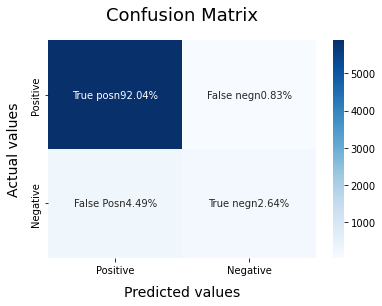

In [79]:
CVmodel= svm.SVC(kernel='linear', C=1)
CVmodel=CVmodel.fit(xtrain_bow, ytrain)
model_Evaluate(CVmodel)
y_pred4 = CVmodel.predict(xvalid_bow)

# K Fold Cross Validation Model

In [80]:
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
model = LogisticRegression()
scores = cross_val_score(model,xtrain_bow, ytrain, scoring='accuracy', cv=cv, n_jobs=-1)
print("Accuracy: %.3f " %mean(scores))
scores1 = cross_val_score(model,xtrain_bow, ytrain, scoring='f1', cv=cv, n_jobs=-1)
print("F1 Score: %.3f " %mean(scores1))
scores2 = cross_val_score(model,xtrain_bow, ytrain, scoring='recall', cv=cv, n_jobs=-1)
print("Recall: %.3f " %mean(scores2))
scores3 = cross_val_score(model,xtrain_bow, ytrain, scoring='precision', cv=cv, n_jobs=-1)
print("Precision: %.3f " %mean(scores3))

Accuracy: 0.948 
F1 Score: 0.499 
Recall: 0.369 
Precision: 0.774 


# Linear Regression Model

In [81]:
linreg = LinearRegression()
linreg.fit(xtrain_bow, ytrain)
y_pred= linreg.predict(xvalid_bow)

print("Mean absolute error:", metrics.mean_absolute_error(yvalid, y_pred))
print("Mean squared error:", metrics.mean_squared_error(yvalid, y_pred))
print("Root mean squared error:", np.sqrt(metrics.mean_squared_error(yvalid, y_pred)))
print("R2 error:", metrics.r2_score(yvalid, y_pred))

Mean absolute error: 0.10778923357008005
Mean squared error: 0.04483810685679938
Root mean squared error: 0.21175010473857947
R2 error: 0.3230995778970974


# Random Forest Classifier

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5937
           1       0.62      0.54      0.58       456

    accuracy                           0.94      6393
   macro avg       0.79      0.76      0.77      6393
weighted avg       0.94      0.94      0.94      6393



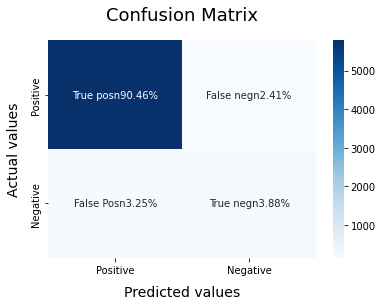

In [82]:
from sklearn.ensemble import RandomForestClassifier
RFCmodel= RandomForestClassifier()
RFCmodel=RFCmodel.fit(xtrain_bow, ytrain)
model_Evaluate(RFCmodel)
y_pred4 = RFCmodel.predict(xvalid_bow)

# Train Test Split: 70-30

In [83]:
train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      8905
           1       0.55      0.48      0.51       684

    accuracy                           0.93      9589
   macro avg       0.75      0.72      0.74      9589
weighted avg       0.93      0.93      0.93      9589



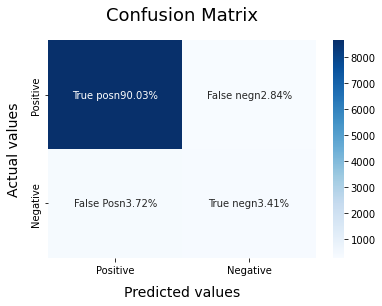

In [84]:
BNBmodel = BernoulliNB()
BNBmodel.fit(xtrain_bow, ytrain)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(xvalid_bow)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8905
           1       0.74      0.38      0.50       684

    accuracy                           0.95      9589
   macro avg       0.85      0.68      0.73      9589
weighted avg       0.94      0.95      0.94      9589



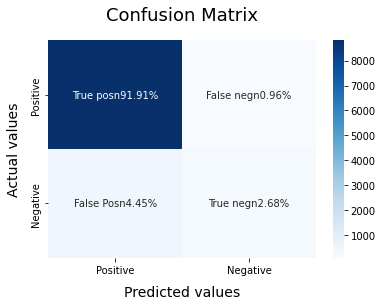

In [85]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(xtrain_bow, ytrain)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(xvalid_bow)


              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8905
           1       0.76      0.35      0.48       684

    accuracy                           0.95      9589
   macro avg       0.86      0.67      0.73      9589
weighted avg       0.94      0.95      0.94      9589



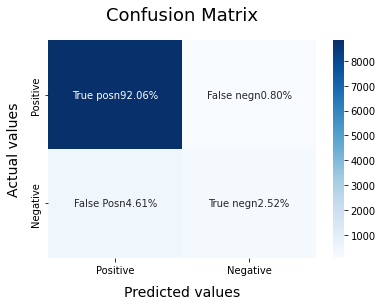

In [86]:
CVmodel= svm.SVC(kernel='linear', C=1)
CVmodel=CVmodel.fit(xtrain_bow, ytrain)
model_Evaluate(CVmodel)
y_pred4 = CVmodel.predict(xvalid_bow)

In [87]:
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
model = LogisticRegression()
scores = cross_val_score(model,xtrain_bow, ytrain, scoring='accuracy', cv=cv, n_jobs=-1)
print("Accuracy: %.3f " %mean(scores))
scores1 = cross_val_score(model,xtrain_bow, ytrain, scoring='f1', cv=cv, n_jobs=-1)
print("F1 Score: %.3f " %mean(scores1))
scores2 = cross_val_score(model,xtrain_bow, ytrain, scoring='recall', cv=cv, n_jobs=-1)
print("Recall: %.3f " %mean(scores2))
scores3 = cross_val_score(model,xtrain_bow, ytrain, scoring='precision', cv=cv, n_jobs=-1)
print("Precision: %.3f " %mean(scores3))

Accuracy: 0.949 
F1 Score: 0.505 
Recall: 0.375 
Precision: 0.781 


              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8905
           1       0.72      0.38      0.50       684

    accuracy                           0.95      9589
   macro avg       0.84      0.68      0.73      9589
weighted avg       0.94      0.95      0.94      9589



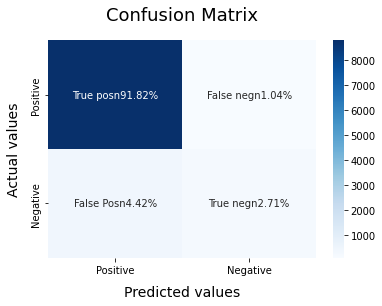

In [88]:
SVCmodel = LinearSVC()
SVCmodel.fit(xtrain_bow, ytrain)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(xvalid_bow)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      8905
           1       0.48      0.48      0.48       684

    accuracy                           0.93      9589
   macro avg       0.72      0.72      0.72      9589
weighted avg       0.93      0.93      0.93      9589



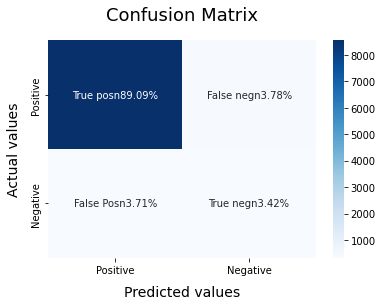

In [89]:
DTmodel=DecisionTreeClassifier(random_state=0)
DTmodel.fit(xtrain_bow, ytrain)
model_Evaluate(DTmodel)
y_pred2 = DTmodel.predict(xvalid_bow)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      8905
           1       0.58      0.51      0.54       684

    accuracy                           0.94      9589
   macro avg       0.77      0.74      0.75      9589
weighted avg       0.94      0.94      0.94      9589



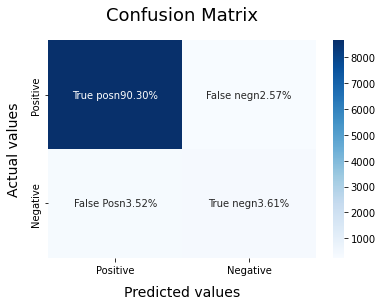

In [90]:
from sklearn.ensemble import RandomForestClassifier
RFCmodel= RandomForestClassifier()
RFCmodel=RFCmodel.fit(xtrain_bow, ytrain)
model_Evaluate(RFCmodel)
y_pred4 = RFCmodel.predict(xvalid_bow)

In [91]:
linreg = LinearRegression()
linreg.fit(xtrain_bow, ytrain)
y_pred= linreg.predict(xvalid_bow)

print("Mean absolute error:", metrics.mean_absolute_error(yvalid, y_pred))
print("Mean squared error:", metrics.mean_squared_error(yvalid, y_pred))
print("Root mean squared error:", np.sqrt(metrics.mean_squared_error(yvalid, y_pred)))
print("R2 error:", metrics.r2_score(yvalid, y_pred))

Mean absolute error: 0.10896950869342924
Mean squared error: 0.04628494512219392
Root mean squared error: 0.2151393620939551
R2 error: 0.30129095577917253
